In [2]:
import os
import shutil

In [3]:
class_0 = [i for i in os.listdir() if i[-5:] == '0.jpg']
class_1 = [i for i in os.listdir() if i[-5:] == '1.jpg']

In [4]:
all_classes = [class_0, class_1]

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [6]:
IMG_SIZE = 100

training_data = []

def create_training_data():
    for category in [0,1]:  # do for label 0 and 1

        for img in all_classes[category]:  # iterate over each image per assigned label
            try:
                img_array = cv2.imread(img)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, category])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

In [7]:
import random
random.shuffle(training_data)

In [8]:
len(training_data)

106

In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
# y = np.array(y)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
history = model.fit(X, y, batch_size=4, epochs=100, validation_split=0.3, callbacks=[callback])



Epoch 1/100
19/19 [==============================] - 12s 87ms/step - loss: 3.2615 - accuracy: 0.5676 - val_loss: 0.6924 - val_accuracy: 0.5625
Epoch 2/100
19/19 [==============================] - 1s 53ms/step - loss: 0.7234 - accuracy: 0.6892 - val_loss: 0.6894 - val_accuracy: 0.5625
Epoch 3/100
19/19 [==============================] - 1s 52ms/step - loss: 0.6767 - accuracy: 0.6892 - val_loss: 0.6889 - val_accuracy: 0.5625
Epoch 4/100
19/19 [==============================] - 1s 51ms/step - loss: 0.6697 - accuracy: 0.6892 - val_loss: 0.6855 - val_accuracy: 0.5625
Epoch 5/100
19/19 [==============================] - 1s 52ms/step - loss: 0.7561 - accuracy: 0.6892 - val_loss: 2.1973 - val_accuracy: 0.5625
Epoch 6/100
19/19 [==============================] - 1s 52ms/step - loss: 0.7004 - accuracy: 0.6892 - val_loss: 0.6910 - val_accuracy: 0.5625
Epoch 7/100
19/19 [==============================] - 1s 51ms/step - loss: 0.5963 - accuracy: 0.7162 - val_loss: 1.5452 - val_accuracy: 0.5312
Epoch

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X).round(), y)

0.8584905660377359

In [13]:
import pandas as pd
df = pd.DataFrame(history.history)

In [14]:
df['epoch'] = list(range(1, len(df) +1))

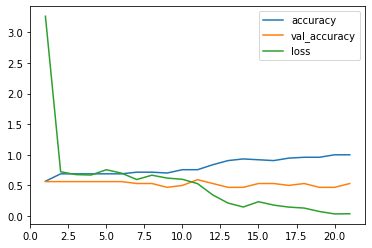

In [16]:
plt.plot(df.epoch, df.accuracy, label ='accuracy')
plt.plot(df.epoch, df.val_accuracy, label ='val_accuracy')
plt.plot(df.epoch, df.loss, label = 'loss')
plt.legend()


In [17]:
df

,loss,accuracy,val_loss,val_accuracy,epoch
0,3.261489,0.567568,0.692367,0.56250,1
1,0.723438,0.689189,0.689421,0.56250,2
2,0.676729,0.689189,0.688893,0.56250,3
3,0.669681,0.689189,0.685480,0.56250,4
4,0.756121,0.689189,2.197304,0.56250,5
5,0.700367,0.689189,0.691040,0.56250,6
6,0.596320,0.716216,1.545199,0.53125,7
7,0.666830,0.716216,0.695596,0.53125,8
8,0.619875,0.702703,0.738962,0.46875,9
9,0.600044,0.756757,0.707160,0.50000,10
